# Advanced Machine Learning
# Exercise 4 - The Bayesian Mechanic – Bayesian Networks Challenge

by   
Segall Tomer, ID301833833  
Millis Sahar, ID300420379  

<br><br><br>
**Instructional comments:**

- All of the nodes in the model are going to be binary, e.g there is either enough oil or not, a
car is either made in China or not, etc.

- The data is provided as a csv file with the node names in the first row.
  - The OR column is a binary or operator between the FAULTY and NOWATER
variables. You can use it as a node in your model.

- Invest some time to explore the Pomegranate package and understand the logic behind the
classes/functions you can use for building your Bayesian network

<br><br><br>

### Intro :  
On your last road trip your old car started to make weird noises, you noticed smoke rising from the engine, and a high temperature alert started flashing on the dashboard.   

Having to wait for a tow truck to take your car to the mechanic ruined your trip, and you decided that you must use your newly acquired knowledge in `Bayesian networks` to create an automatic diagnosis tool for car
problems called The `Bayesian MechanicTM` so that you won’t be so hopeless next time.

<br><br><br>

# Prerequisites

##### Installs

In [ ]:
!pip install pomegranate

In [ ]:
!sudo apt-get install graphviz graphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install pygraphviz

##### Imports

In [ ]:
# general
import os
import pandas as pd
from pprint import pprint

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import pygraphviz

# logic - BN
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, State, BayesianNetwork

# drive
from google.colab import drive

##### Google Drive

In [ ]:
drive.mount(r'/content/drive/',force_remount=True) 

data_dir = os.getcwd() + '/drive/My Drive/Colab Notebooks/AdvancedML/HW4/'

Mounted at /content/drive/


##### Dataset

In [ ]:
filepath = data_dir + "bayesian_mechanic_data_2000_results.csv"
df = pd.read_csv(filepath)

print(df.shape)
df.head()

(2000, 8)


,CHINESE,DATASCI,FAULTY,NOWATER,NOOIL,OR,WATERALERT,TEMPALERT
0,1,1,1,1,1,1,2,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,2,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1


In [ ]:
df.describe()

,CHINESE,DATASCI,FAULTY,NOWATER,NOOIL,OR,WATERALERT,TEMPALERT
count,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.04800,1.085000,1.015500,1.02150,1.324500,1.036500,1.078500,1.346500
std,0.21382,0.278951,0.123561,0.14508,0.468305,0.187578,0.269024,0.475974
min,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
50%,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,1.00000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000
max,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000


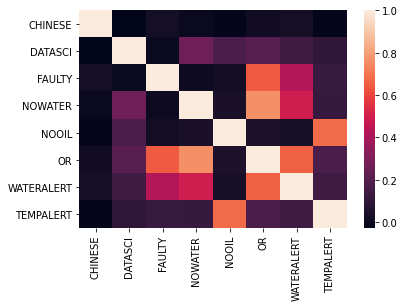

In [ ]:
correlations = df.corr()
sns.heatmap(correlations);

<br><br><br>

# A - Domain Knowledge

- You know that cars that are made in China are more likely to have faulty dashboards that
randomly show high temperature or low water level alerts.

- You know that the low water level dashboard alert pops up when either there’s not enough
water in the water tank, or when the dashboard is faulty.

- You know that the high temperature dashboard alert pops up when there’s not enough oil in
the oil reservoir, when there’s not enough water in the water tank, or when the dashboard
is faulty.

- A friend of yours once said that even though data scientists are really smart, they don’t
know the first thing about car maintenance, and so the water and oil levels in their cars are
more likely to be low.


### A.1. Use your domain knowledge to create a `Bayesian network` model for the car temperature problem. 


##### Answer: 
**For each statement we will give the related Bayesian network connections.** 

<br><br>

- Cars that are made in China are more likely to have faulty dashboards. 
We can observe the following from this statement: 
  - $ CHINESE \rightarrow FAULTY$

<br>

- Low water level dashboard alert pops up when either there’s not enough water in the water tank, or when the dashboard is faulty. We can observe the following from this statement:
  - $ NOWATER \rightarrow WATERALERT$ 
  - $ FAULTY \rightarrow WATERALERT$ 

<br>

- The high temperature dashboard alert pops up when there’s not enough oil in the oil reservoir, when there’s not enough water in the water tank, or when the dashboard is faulty. We can observe the following from this statement: 
  - $ NOOIL \rightarrow TEMPALERT$ 
  - $ NOWATER \rightarrow TEMPALERT$ 
  - $ FAULTY \rightarrow TEMPALERT$ 

<br>

- Data scientists don’t know the first thing about car maintenance, and so the water and oil levels in their cars are more likely to be low. We can observe the following from this statement:
  - $ DATASCI \rightarrow NOWATER$
  - $ DATASCI \rightarrow NOOIL$ 

<br>

##### Code:
(this time we will elaborate due to this beening our first time using this package)

Initialize distributions and conditional probabilities


In [ ]:
chinese = DiscreteDistribution({1: 1/2, 2: 1/2})

datasci = DiscreteDistribution({1: 1/4, 2: 3/4})

faulty = ConditionalProbabilityTable([[1, 1, 0.8],
                                      [1, 2, 0.2],
                                      [2, 1, 0.6],
                                      [2, 2, 0.4]],[chinese])

nowater = ConditionalProbabilityTable([[1, 1, 0.3],
                                      [1, 2, 0.7],
                                      [2, 1, 0.55],
                                      [2, 2, 0.45]],[datasci])

wateralert = ConditionalProbabilityTable([[1, 1, 1, 0.7],
                                          [1, 1, 2, 0.3],
                                          [1, 2, 1, 0.6],
                                          [1, 2, 2, 0.4],
                                          [2, 1, 1, 0.5],
                                          [2, 1, 2, 0.5],
                                          [2, 2, 1, 0.9],
                                          [2, 2, 2, 0.1]], [faulty, nowater])

nooil = ConditionalProbabilityTable([[1, 1, 0.8],
                                      [1, 2, 0.2],
                                      [2, 1, 0.7],
                                      [2, 2, 0.3]],[datasci])

tempalert = ConditionalProbabilityTable([[1,1,1,1, 0.6],
                                         [1,1,1,2, 0.4],
                                         [1,1,2,1, 0.8],
                                         [1,1,2,2, 0.2],
                                         [1,2,1,1, 0.7],
                                         [1,2,1,2, 0.3],
                                         [1,2,2,1, 0.1],
                                         [1,2,2,2, 0.9],
                                         [2,1,1,1, 0.1],
                                         [2,1,1,2, 0.9],
                                         [2,1,2,1, 0.55],
                                         [2,1,2,2, 0.45],
                                         [2,2,1,1, 0.4],
                                         [2,2,1,2, 0.6],
                                         [2,2,2,1, 0.15],
                                         [2,2,2,2, 0.85]], [faulty, nowater, nooil])

Create states


In [ ]:
s1 = State(chinese, name="chinese")
s2 = State(datasci, name="datasci")
s3 = State(faulty, name="faulty")
s4 = State(nowater, name="nowater")
s5 = State(nooil, name="nooil")
s6 = State(nooil, name="or")
s7 = State(wateralert, name="wateralert")
s8 = State(tempalert, name="tempalert")

Create the Bayesian network

In [ ]:
model = BayesianNetwork("Bayesian Mechanic")

Add states to the network 


In [ ]:
model.add_states(s1, s2, s3, s4, s5, s6, s7,s8)

Add edges which represent conditional dependencies, where the second node is conditionally dependent on the first node

In [ ]:
model.add_edge(s1, s3)
model.add_edge(s2, s4)
model.add_edge(s2, s5)

model.add_edge(s3, s6) 
model.add_edge(s4, s6) 

model.add_edge(s5, s8)
model.add_edge(s6, s7) 
model.add_edge(s6, s8) 

Finalize the topology of the model

In [ ]:
model.bake()

### A.2. Draw the network by using the `Pomegranate` python package

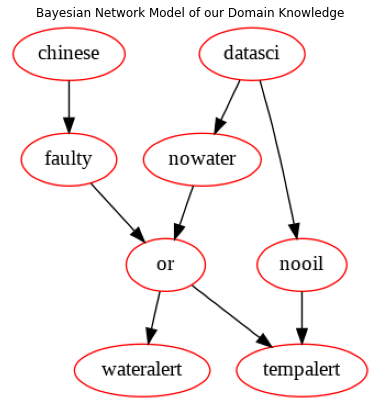

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bayesian Network Model of our Domain Knowledge')

model.plot()

**Model params:**

In [ ]:
def display_model_dist(model_):
  for i,s in enumerate(model_.to_dict()['states']):
    if 'parameters' in s['distribution']:
      print('state #',i,' ==> ','\n', s['distribution']['parameters'],end='\n\n')
    else:
      print('state #',i,' ==> ')
      pprint(s['distribution']['table'])
      print()

display_model_dist(model)

state # 0  ==>  
 [{'1': 0.5, '2': 0.5}]

state # 1  ==>  
 [{'1': 0.25, '2': 0.75}]

state # 2  ==> 
[['1', '1', '0.8'], ['1', '2', '0.2'], ['2', '1', '0.6'], ['2', '2', '0.4']]

state # 3  ==> 
[['1', '1', '0.3'], ['1', '2', '0.7'], ['2', '1', '0.55'], ['2', '2', '0.45']]

state # 4  ==> 
[['1', '1', '0.8'], ['1', '2', '0.2'], ['2', '1', '0.7'], ['2', '2', '0.3']]

state # 5  ==> 
[['1', '1', '0.8'], ['1', '2', '0.2'], ['2', '1', '0.7'], ['2', '2', '0.3']]

state # 6  ==> 
[['1', '1', '1', '0.7'],
 ['1', '1', '2', '0.3'],
 ['1', '2', '1', '0.6'],
 ['1', '2', '2', '0.4'],
 ['2', '1', '1', '0.5'],
 ['2', '1', '2', '0.5'],
 ['2', '2', '1', '0.9'],
 ['2', '2', '2', '0.10000000000000002']]

state # 7  ==> 
[['1', '1', '1', '1', '0.6'],
 ['1', '1', '1', '2', '0.4'],
 ['1', '1', '2', '1', '0.8'],
 ['1', '1', '2', '2', '0.2'],
 ['1', '2', '1', '1', '0.7'],
 ['1', '2', '1', '2', '0.3'],
 ['1', '2', '2', '1', '0.10000000000000002'],
 ['1', '2', '2', '2', '0.9'],
 ['2', '1', '1', '1', '0.100000

<br><br><br><br>

# B - Dataset
Use the data you have to learn the parameters of the model. You should do it by building
your graph based on the Pomegranate python package.

In [ ]:
states = {v:k for k,v in enumerate(df.columns.str.lower())}

### B.1. Fit The model


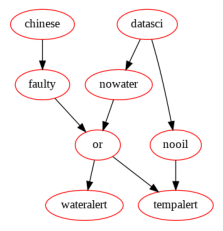

In [ ]:
# choose the right structure
structure = ((), 
             (), 
             (states["chinese"],), 
             (states["datasci"],), 
             (states["datasci"],), 
             (states["faulty"], states["nowater"]), 
             (states["or"],), 
             (states["or"], states["nooil"], ))

# fit the more on the dataset
model = BayesianNetwork.from_structure(df,state_names=df.columns.str.lower(),structure=structure);

# plot
model.plot()

In [ ]:
# print model
display_model_dist(model)

state # 0  ==>  
 [{'1': 0.952, '2': 0.048}]

state # 1  ==>  
 [{'1': 0.915, '2': 0.085}]

state # 2  ==> 
[['1', '1', '0.9852941176470589'],
 ['1', '2', '0.014705882352941173'],
 ['2', '1', '0.96875'],
 ['2', '2', '0.03125']]

state # 3  ==> 
[['1', '1', '0.9901639344262295'],
 ['1', '2', '0.009836065573770493'],
 ['2', '1', '0.8529411764705882'],
 ['2', '2', '0.14705882352941177']]

state # 4  ==> 
[['1', '1', '0.7005464480874317'],
 ['1', '2', '0.2994535519125683'],
 ['2', '1', '0.40588235294117647'],
 ['2', '2', '0.5941176470588235']]

state # 5  ==> 
[['1', '1', '1', '1.0'],
 ['1', '1', '2', '0.0'],
 ['1', '2', '1', '0.0'],
 ['1', '2', '2', '1.0'],
 ['2', '1', '1', '0.0'],
 ['2', '1', '2', '1.0'],
 ['2', '2', '1', '0.0'],
 ['2', '2', '2', '1.0']]

state # 6  ==> 
[['1', '1', '0.9558899844317592'],
 ['1', '2', '0.0441100155682408'],
 ['2', '1', '0.013698630136986304'],
 ['2', '2', '0.9863013698630136']]

state # 7  ==> 
[['1', '1', '1', '0.8947368421052632'],
 ['1', '1', '2', '0.1

<br><br><br><br>

# C. d-separation
To get better understanding of the model, please use d-separation rules to answer:


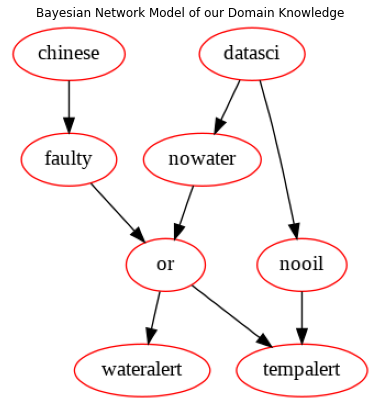

**C.i. Is {NOOIL} d-separated from {NOWATER} given {DATASCI}? Why?**
```
Yes. 
We can see there is a diverging connection between them,  as NOOIL and NOWATER are children of DATASCI.
```


**C.ii. Is {DATASCI} d-separated from {WATERALERT} given {NOWATER}? Why?**  
```
Yes.  
We can see there is a serial connection between them as if NOWATER is known, DATASCI and WATERALERT are d-separated.
```

**C.iii. Is {CHINESE} d-separated from {NOOIL} given {DATASCI} ? Why?**
```
No.
We can see there is no connection between them that will lead to an active path, also there is no evidence passed between the variables.
```

**C.iv. Is {CHINESE} d-separated from {DATASCI, NOOIL} given {TEMPALERT,NOWATER}? Why?**
```
Yes.
We can see there is a connection between these groups, and CHINESE is d-separated.
```
<!-- We can see there is no connection between them that will lead to an active path, also there is no evidence passed between the variables. -->

<br><br><br><br>

# D Answer the following questions based on the model you have built:


The following is the order of nodes insertion to the graph:

s0 - chinese  
s1 - datasci  
s2 - faulty   
s3 - nowater   
s4 - nooil   
s5 - or  
s6 - wateralert  
s7 - tempalert  

##### D.i. What is P(NOWATER|WATERALERT=2,TEMPALERT=2)


In [ ]:
s = 'nowater'
o = {'wateralert': 2, 'tempalert': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.5966043322656919, 2: 0.4033956677343081}

##### D.ii. What is P(NOOIL|TEMPALERT=2)


In [ ]:
s = 'nooil'
o = {'tempalert': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.24608887344612224, 2: 0.7539111265538778}

##### D.iii. What is P(FAULTY|TEMPALERT=2, WATERALERT=2)


In [ ]:
s = 'faulty'
o = {'wateralert': 2, 'tempalert': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.7429272442845594, 2: 0.25707275571544064}

##### D.iv. What is P(TEMPALERT|DATASCI=2)?


In [ ]:
s = 'tempalert'
o = {'datasci': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.43031783461336953, 2: 0.5696821653866304}

##### D.v. What is P(TEMPALERT|DATASCI=1)?


In [ ]:
s = 'tempalert'
o = {'datasci': 1}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.6733570830449479, 2: 0.3266429169550522}

##### D.vi. What is P(WATERALERT|CHINESE=2)?


In [ ]:
s = 'wateralert'
o = {'chinese': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.9068224253088758, 2: 0.09317757469112428}

##### D.vii. What is P(NOWATER)?


In [ ]:
s = 'nowater'
o = {}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.9784999999999996, 2: 0.021500000000000456}

##### D.viii. What is P(FAULTY)?


In [ ]:
s = 'faulty'
o = {}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.9844999999999996, 2: 0.01550000000000043}

##### **D.ix. What is P(FAULTY|OR=2)?**


In [ ]:
s = 'faulty'
o = {'or':2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.5772736880143439, 2: 0.4227263119856561}

##### **D.x. What is P(FAULTY|OR=2,NOWATER=2)?**

In [ ]:
s = 'faulty'
o = {'or':2, 'nowater': 2}

result = model.predict_proba(o)
result[states[s]].parameters[0]

{1: 0.9844999999999996, 2: 0.01550000000000043}

# E. A simple way to estimate the model’s performance is using the log-probability of the model over all instances it was trained on.

**E.i. Calculate the log-probability of your model**

In [ ]:
# calculation of the log probability of the trained model over all training instances
log_prob_sum = model.log_probability(df.values).sum() * -1
print(f"Log probability sum over all training instances of the trained model is {log_prob_sum}")

Log probability sum over all training instances of the trained model is 3661.007105635488


**E.ii. Re build your model, but this time use the Chow-Liu algorithm. Re calculate the log-probability and compare with the results you get in the previous subsection. Does results make sense? Shortly explain why**

Log probability sum over all training instances of the Chow-Liu model is 3740.6693451746005



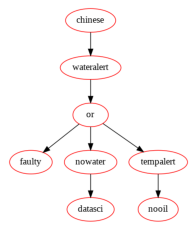

In [ ]:
model_chow_liu = BayesianNetwork.from_samples(df, algorithm='chow-liu',state_names=df.columns.str.lower())
log_prob_sum = model_chow_liu.log_probability(df.values).sum() * -1

print(f"Log probability sum over all training instances of the Chow-Liu model is {log_prob_sum}\n")

model_chow_liu.plot()

As we can see, the Chow-Liu model performs slightly better than our domain knowledge based model. This is probably due to the fact that there are more underlying relations between the different variables that are not part of our domain knowledge  

<br><br><br><br>

# References:

https://github.com/jmschrei/pomegranate/tree/master/tutorials

https://towardsdatascience.com/statistical-modeling-with-pomegranate-fast-and-intuitive-4d605d9c33a9

https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb

https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb

<br><br><br><br>

Thanks for reading :)